## Instructions
- See deadline on the course web page
- This problem set is solved individually. See examination rules on the course web page and the explanation of the examination procedure below.
- The two notebooks for each problem set contain a number of basic and extra problems; you can choose which and how many to work on. The extra problems are usually more challenging.
- Students are allowed to discuss together and help each other when solving the problems. However, every student must understand their submitted solution in the sense that they should be able to explain and discuss them with a peer or with a teacher.
- While discussions with your peers are allowed (and even encouraged), direct plagiarism is not. Every student must reach their own understanding of submitted solutions according to the definition in the previous point.
- The use of coding assistance from code generating artificial intelligence tools is allowed. However, every student must reach their own understanding of submitted solutions (including employed algorithms) according to the definition above.
- Some problems include checkpoints in the form of `assert` statements. These usually check some basic functionality and you should make sure that your code passes these statements without raising an `AssertionError`. 
- Do not use other python modules than the ones included in the `environment.yml` file in the course github repo. 

- **Important:** The grading of problem sets requires **all** of the following actions:
  1. Make sure to always complete **Task 0** in the header part of the notebook and that this part does not raise any `AssertionError`(s).
  1. **Complete** the corresponding questions in Yata for every task that you have completed. This usually involves copying and pasting some code from your solution notebook and passing the code tests. You need to have a green check mark on Yata to get the corresponding points.
  1. **Upload** your solution in the form of your edited version of this Jupyter notebook via the appropriate assignment module in Canvas (separate for basic and extra tasks). It is the code and results in your submitted notebook that is considered to be your hand-in solution.
  1. If selected, be **available for a discussion** of your solution with one of the teachers on the Monday afternoon exercise session directly following the problem set deadline. No extra preparation is needed for these discussions apart from familiarity with your own solution. A list of randomly selected students will be published on the course web page around Monday noon. During the afternoon session that same day, students will be called in the numbered order until the end of the list (or the end of the exercise session). You must inform the responsible teacher as soon as possible following the publication of the student list if you can not be physically present at the exercise session (in which case we will have the discussion on zoom). An oral examination (on all aspects of the course) will be arranged during the exam week for students that do not show up for their discussion slot, or that fail to demonstrate familiarity with their hand-in solutions.

- Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

- Make sure that the **run time is smaller than a few minutes**. If needed you might have to reduce some computational tasks; e.g. by decreasing the number of grid points or sampling steps. Please ask the supervisors if you are uncertain about the run time. 

- Your solutions are usually expected where it says `YOUR CODE HERE` or <font color="red">"PLEASE WRITE YOUR ANSWER HERE"</font>.

### Task 0 
#### (0 points)

By changing the below boolean variable `student_self_assessment` to `True` you attest that:
- All handed in solutions were produced by yourself in the sense that you understand your solutions and should be able to explain and discuss them with a peer or with a teacher.


In [1]:
student_self_assessment = False

# 
# YOUR CODE HERE
# 
student_self_assessment = True

In [2]:
assert student_self_assessment == True, 'You must assert the individual solution statements.'

# Problem Set 1 (Extra problems)
**Learning from data [TIF285], Chalmers, Fall 2025**

Last revised: 30-Aug-2025 by Christian Forssén [christian.forssen@chalmers.se]

In [3]:
# Data directory
DATA_ID = "DataFiles/"

# import modules

# 
# YOUR CODE HERE
# 
import numpy as np
import scipy as scipy
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import emcee as emcee
import time

## Problem 5 [extra] (3 points; manually graded)

### Gradient-descent variants
*You should have solved problem 3 before attempting this problem.*

Write a python class for setting up and optimizing the linear-regression model used in Problem 3 and functionality for performing stochastic and mini-batch gradient descent. Start from the template provided below. You can assume that there is one independent variable (x) and one response variable (y).

In [4]:
class LinearRegression:
    def __init__(self, xdata, ydata, polynomial_order):
        """
        Setup a polynomial model.
        
        Args:
            xdata: array with instances of the independent variable
            ydata: array with instances of the response variable
            polynomial_order: integer, degree of polynomial

        Attributes:
            xdata: data set, array of input independent variables
            ydata: data set, array of response variables
            num_data: integer, length of data set
            polynomial_order: integer, degree of polynomial
            num_parameters: total number of model parameters
            data_design_matrix: array of shape (len(xdata), num_parameters)
                design_matrix corresponding to data set
            theta: current values of model parameters, array of length `num_parameters`
            
        """
        self.xdata = np.array(xdata).reshape(-1, 1)
        self.ydata = np.array(ydata).reshape(-1, 1)
        assert self.xdata.shape[0]==self.ydata.shape[0]
        self.num_data = self.ydata.shape[0]
        self.polynomial_order = polynomial_order
        self.num_parameters = polynomial_order + 1
        assert self.num_parameters <= self.num_data
        self.data_design_matrix = self.create_polynomial_design_matrix(self.xdata)
        self.theta = np.random.uniform(size=self.num_parameters)
        self.randomize=True

    def create_polynomial_design_matrix(self, xdata):
        """
        Create a design matrix for a polynomial model, and return it.
        
        Args:
            xdata: array with instances of the independent variable

        Returns:
            design_matrix: design_matrix, array of shape (len(xdata), num_parameters)
        """
        # 
        # YOUR CODE HERE
        # 
        self.X_d = np.power(xdata, 0)
        deg = self.polynomial_order
        for i in range(1, deg):
            col = np.power(xdata, i)
            self.X_d = np.column_stack((self.X_d,col))
        return self.X_d
        
    def predict(self, xpred):
        """
        Perform a prediction, y_pred = X_pred \theta.

        Args:
            xpred: array with values of the independent variable

        Returns:
            ypred: array of predicted response variables
        """
        # 
        # YOUR CODE HERE
        # 
        self.ypred = xpred @ self.theta
        return self.ypred

    def solve_normal_equation(self):
        """
        Solves the normal equation and updates the parameters theta.

        Attributes:
            theta_fit: Optimized parameters from solving the normal equation (array)
        """
        # 
        # YOUR CODE HERE
        # 
        X_d = self.X_d
        inv = np.linalg.inv((self.X_d).T@self.X_d)
        theta_fit = inv @ (self.X_d).T @ self.ydata
        self.theta_fit = theta_fit.flatten()
        return self.theta_fit

    def gradient(self, xdata, ydata, theta):
        """
        Setup the cost function with the input data and computes its gradient with regards to the model parameters at the specific point.

        Args:
            xdata: array with instances of the independent variable that defines the cost function
            ydata: array with instances of the response variable that defines the cost function
            theta: current values of model parameters

        Returns:
            grad_theta: array, gradient vector
        """
        # 
        # YOUR CODE HERE
        # 
        Nd = self.num_data
        theta = np.array(theta).reshape(-1, 1)
        X_d = self.create_polynomial_design_matrix(xdata)
        self.grad_theta = (-2/Nd*(X_d.T) @ (ydata - (X_d@theta)))
        return self.grad_theta

    def bgd_optimize(self, theta_start, n_epochs=1000, learning_rate=0.1):
        """
        Find optimized parameters using (batch) gradient descent.

        Uses all data in `xdata`, `ydata` attributes and starts from the position theta_start.
    
        Args:
            theta_start: starting guess for model parameters
            n_epochs: Number of epochs (default 1000) (integer)
            learning_rate: learning rate (default 0.1) (float)
                  
        Attributes:
            theta_bgd: Optimized parameters from batch gradient descent (array)
            theta_bgd_history: array of shape (n_epochs+1, self.num_parameters)
                History of parameter updates. Includes the start vector.
        """
        # 
        # YOUR CODE HERE
        # 
        theta_bgd = np.array([theta_start])
        theta_bgd_history = np.array(theta_bgd)
        for i in range(n_epochs):
            grad_theta = (self.gradient(self.xdata, self.ydata, theta_bgd)).T
            theta_bgd = theta_bgd - learning_rate*grad_theta
            theta_bgd_history = np.append(theta_bgd_history, theta_bgd, axis=0)   
        self.theta_bgd = theta_bgd
        self.theta_bgd_history = theta_bgd_history
        return self.theta_bgd, self.theta_bgd_history

    def sgd_optimize(self, theta_start, n_epochs=1000, learning_rate=0.01):
        """
        Find optimized parameters using stochastic gradient descent.

        Uses all data in `xdata`, `ydata` attributes and starts from the position theta_start.
    
        Args:
            theta_start: starting guess for model parameters
            n_epochs: Number of epochs (default 1000) (integer)
            learning_rate: learning rate (default 0.1) (float)
                  
        Attributes:
            theta_sgd: Optimized parameters from stochastic gradient descent (array)
            theta_sgd_history: array of shape (n_epochs+1, self.num_parameters)
                History of parameter updates (end of epoch). Includes the start vector.
        """
        # 
        # YOUR CODE HERE
        # 
        theta_sgd = np.array(theta_start)
        theta_sgd_history = np.array([theta_sgd])
        for i in range(n_epochs): 
            X_d = np.array(self.create_polynomial_design_matrix(self.xdata))
            data = np.append(X_d, self.ydata, axis=1)
            rng = np.random.default_rng()
            rng.shuffle(data)
            for data_instance in data:
                ydata = np.array([data_instance[-1]])
                X_d = np.array([data_instance[:-1]])
                grad_theta = (-2/self.num_data*(X_d.T) @ (ydata - (X_d@theta_sgd)))
                theta_sgd = theta_sgd - learning_rate*grad_theta
                theta = np.array([theta_sgd])
            theta_sgd_history = np.append(theta_sgd_history, theta, axis=0)
            #print(theta_sgd_history)
        self.theta_sgd = theta_sgd
        self.theta_sgd_history = theta_sgd_history
        return self.theta_sgd, self.theta_sgd_history
    
    def mbgd_optimize(self, theta_start, n_epochs=1000, learning_rate=0.01, batch_size=0.2):
        """
        Find optimized parameters using stochastic mini-batch gradient descent.

        Uses all data in `xdata`, `ydata` attributes and starts from the position theta_start.
    
        Args:
            theta_start: starting guess for model parameters
            n_epochs: Number of epochs (default 1000) (integer)
            learning_rate: learning rate (default 0.1) (float)
            batch_size: maximum fraction of data in each mini batch (default 0.2) (float < 1.0)
                  
        Attributes:
            theta_mbgd: Optimized parameters from mini-batch gradient descent (array)
            theta_mbgd_history: array of shape (n_epochs+1, self.num_parameters)
                History of parameter updates (end of epoch). Includes the start vector.
        """
        # 
        # YOUR CODE HERE
        # 
        theta_mbgd = np.array([theta_start])
        theta_mbgd_history = np.array(theta_mbgd)
        batch = int(self.num_data//(1/batch_size))
        batch_extra = int(self.num_data%(1/batch_size))
        for i in range(n_epochs):
            data = np.append(self.xdata, self.ydata, axis=1)
            rng = np.random.default_rng()
            rng.shuffle(data)
            batches_extra = data[:batch_extra]
            batches = data[:batch_extra]
            batches = np.vsplit(data, 5)
            #print(batches)
            for data_instance in batches:
                xdata = np.array([data_instance[:,0]]).T
                ydata = np.array([data_instance[:,1]]).T
                grad_theta = (self.gradient(xdata, ydata, theta_mbgd)).T
                theta_mbgd = theta_mbgd - learning_rate*grad_theta
                self.theta_mbgd = theta_mbgd
            theta_mbgd_history = np.append(theta_mbgd_history, theta_mbgd, axis=0)
            self.theta_mbgd_history = theta_mbgd_history
        return self.theta_mbgd, self.theta_mbgd_history

### (a) Batch and stochastic gradient descent

Implement both batch, stochastic, and mini-batch gradient descent and use these methods to find the best fit parameters of a quadratic model. Make sure that you also save the convergence path, i.e., how the parameters change as a function of iteration number. 

Concerning batch gradient descent you can re-use the methods that you implemented in Problem 3, with relevant modifications to incorporate them in the `LinearRegression` class. Note the use of `n_epochs` as an argument to make results comparable between different algorithms.

* You might want to tune the learning hyperparameter as it can be smaller when you do many parameter updates for each epoch.
* Do 1000 epochs (each epoch corresponding to using all instances of data once).
* Use a mini-batch size of 20% for MBGD.
* Start from `[0., 0., 0.]`.
* Compare with the solution from Problem 3.
* hint: the `permutation` method from `numpy.random` might be useful. The recommended procedure for random number sampling is to create a `Generator` instance with `numpy.random.default_rng` and call the relevant methods as attributes to this instance.

For full points you should also comment on your results.

* Order the methods in terms of computing time for a fixed number of epochs. Can you explain the result?

Write your **commentary in a markdown cell**.

In [5]:
# Read the data from Problem 3, initialize the quadratic model, and find the best fit parameters using
# Normal equation, BGD, SGD, MBGD
# Compare the final parameter values

filename = f'{DATA_ID}PS1_Prob3_data.txt'
data = np.loadtxt(filename)
xdata = data[:,0]
ydata = data[:,1]

# 
# YOUR CODE HERE
# 
theta_start = np.array([0., 0., 0.,])
Lin = LinearRegression(xdata, ydata, 3)
normaleq = Lin.solve_normal_equation()
bgd = Lin.bgd_optimize(theta_start, n_epochs=1000, learning_rate=0.1)
sgd = Lin.sgd_optimize(theta_start, n_epochs=1000, learning_rate=0.1)
mbgd = Lin.mbgd_optimize(theta_start, n_epochs=1000, learning_rate=0.1, batch_size=0.2)
print(f'Normal equation solution: {normaleq}')
print(f'Batch gradient descent solution: {bgd[0].flatten()}')
print(f'Mini-batch gradient descent solution: {mbgd[0].flatten()}')
print(f'Stochastic gradient descent solution: {sgd[0].flatten()}')


Normal equation solution: [0.20661169 1.10887503 0.69743377]
Batch gradient descent solution: [0.21974214 1.07353941 0.71466825]
Mini-batch gradient descent solution: [0.21886155 1.07320006 0.71291501]
Stochastic gradient descent solution: [0.21919804 1.07431864 0.71333192]


In [6]:
# This cell can be used to explore the computing time for the different GD implementations.
# 
# YOUR CODE HERE
# 
start_time = time.time()
Lin.bgd_optimize(theta_start, n_epochs=1000, learning_rate=0.1)
print(f'Computing time BGD: {time.time()-start_time} s')

start_time = time.time()
Lin.mbgd_optimize(theta_start, n_epochs=1000, learning_rate=0.1, batch_size=0.2)
print(f'Computing time MBGD: {time.time()-start_time} s')

start_time = time.time()
Lin.sgd_optimize(theta_start, n_epochs=1000, learning_rate=0.1)
print(f'Computing time SGD: {time.time()-start_time} s')


Computing time BGD: 0.05359601974487305 s
Computing time MBGD: 0.4128706455230713 s
Computing time SGD: 1.2560715675354004 s


The $\theta$ parameters are similar for the three gradient descent method and close to the normal equation solution. This indicates that all three solutions have reached the correct minimi for the costfunction and found the correct values of $\theta$. The batch gradient descent method took the least amount of time, and the stochastic gradient descent method took the most time. This is reasonable, as BGD used the least amount of itterations for the same amount of epochs, and SGD used the most amount (as it iterated over all the data and calculated the gradient for each datapoint for each epoch). As the number of iterations for MBGD is between those for BGD and SGD, it is expected that MBGD was between them in computation time. 

### (b) Convergence
Compare the convergence pattern for the BGD, SGD and MBGD, i.e. plot the path towards the optimal set of parameters as a function of the epochs. 
- You can start from $\theta=(0,0,0)$ with all three GD algorithms.
- Note that the path is in 3D (since there are three parameters in our quadratic model). You should plot the three different 2D projections of the path (you might want to select the plot range such that the difference convergence behaviors can be seen).
- Indicate also the true optimum (as found by solving the normal equation).

For full points you should also comment on your results. 
- Did you use different learning rates for the different algorithms (if so, why?). 
- Studying the convergence pattern, what are the main features of the different algorithms?
- Which algorithm is more efficient in terms of approaching the optimum faster?

Write your commentary in a markdown cell. You can also produce an additional figure to qualify your commentary on the efficiency of the algorithms.

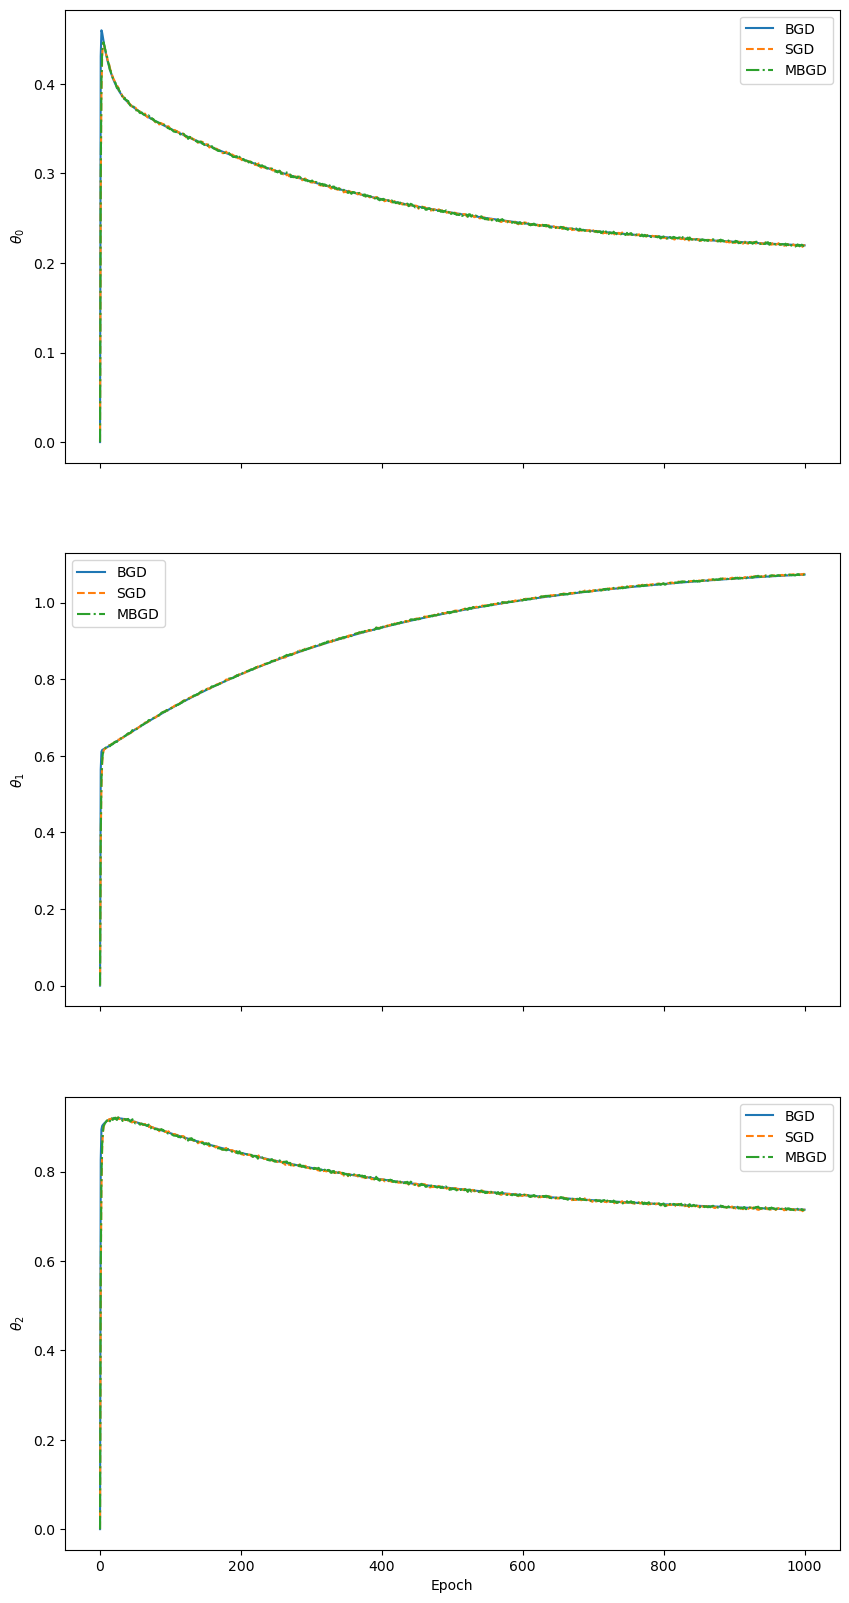

In [7]:
# 
# YOUR CODE HERE
# 
n_epochs=1000
theta_start = np.array([0., 0., 0.])
epochs = np.linspace(0, n_epochs, n_epochs+1)

fig, ax = plt.subplots(3,1, sharex=True, figsize=(10, 20))
ax[0].plot(epochs, bgd[1][:,0], label='BGD')
ax[0].plot(epochs, sgd[1][:,0], linestyle='--', label='SGD')
ax[0].plot(epochs, mbgd[1][:,0], linestyle='-.', label='MBGD')
ax[1].plot(epochs, bgd[1][:,1], label='BGD')
ax[1].plot(epochs, sgd[1][:,1], linestyle='--', label='SGD')
ax[1].plot(epochs, mbgd[1][:,1], linestyle='-.', label='MBGD')
ax[2].plot(epochs, bgd[1][:,2], label='BGD')
ax[2].plot(epochs, sgd[1][:,2], linestyle='--', label='SGD')
ax[2].plot(epochs, mbgd[1][:,2], linestyle='-.', label='MBGD')
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[2].set_xlabel('Epoch')
ax[0].set_ylabel(r'$\theta_0$')
ax[1].set_ylabel(r'$\theta_1$')
ax[2].set_ylabel(r'$\theta_2$')
plt.show()

The convergence patterns for the gradient descent methods are very similar, and almost no difference can be seen. I used the same learning rate for all three methods, and the convergence rate would have been different with differing learning rates. 

## Problem 6 [extra] (3 points; manually graded)

### Adam
Repeat Problem 5 but implement also the Adam optimizer (see the lecture notes) into the `LinearRegression` class.

For full points you should also comment on your results. 
- What behaviour do you observe for the convergence of the Adam optimizer? 
- Study the adaptiveness of the learning rate of the Adam optimizer.

Note that the parameter update with the Adam optimizer is not a simple $-\eta_n \boldsymbol{\nabla} C_n$. However, we can define an effective learning rate for parameter $i$ as ${\eta}_{\mathrm{eff},i} = -\Delta {\theta}_i / \boldsymbol{\nabla} C_i$ (suppressing here the label for the epoch number).

Write your commentary in a markdown cell and illustrate with figures as appropriate.

In [8]:
class LinearRegression:
    def __init__(self, xdata, ydata, polynomial_order):
        """
        Setup a polynomial model.
        
        Args:
            xdata: array of independent variables
            ydata: array of response variables
            polynomial_order: integer, degree of polynomial

        Attributes:
            xdata: data set, array of input independent variables
            ydata: data set, array of response variables
            num_data: integer, length of data set
            polynomial_order: integer, degree of polynomial
            num_parameters: total number of model parameters
            data_design_matrix: array of shape (len(xdata), num_parameters)
                design_matrix corresponding to data set
            theta: current values of model parameters, array of length `num_parameters`
            
        """
        self.xdata = np.array(xdata).reshape(-1, 1)
        self.ydata = np.array(ydata).reshape(-1, 1)
        assert self.xdata.shape[0]==self.ydata.shape[0]
        self.num_data = self.ydata.shape[0]
        self.polynomial_order = polynomial_order
        self.num_parameters = polynomial_order + 1
        assert self.num_parameters <= self.num_data
        self.data_design_matrix = self.create_polynomial_design_matrix(self.xdata)
        self.theta = np.random.uniform(size=self.num_parameters)

    def create_polynomial_design_matrix(self, xdata):
        """
        Create a design matrix for a polynomial model, and return it.
        
        Args:
            xdata: array of independent variables

        Returns:
            design_matrix: design_matrix, array of shape (len(xdata), num_parameters)
        """
        # 
        # YOUR CODE HERE
        # 
        self.X_d = np.power(xdata, 0)
        deg = self.polynomial_order
        for i in range(1, deg):
            col = np.power(xdata, i)
            self.X_d = np.column_stack((self.X_d,col))
        return self.X_d
        

    def predict(self, xpred):
        """
        Perform a prediction, y_pred = X_pred \theta.

        Args:
            xpred: array of independent variables

        Returns:
            ypred: array of predicted response variables
        """
        # 
        # YOUR CODE HERE
        # 
        self.ypred = xpred @ self.theta
        return self.ypred

    def solve_normal_equation(self):
        """
        Solves the normal equation and updates the parameters theta.

        Attributes:
            theta_fit: Optimized parameters from solving the normal equation (array)
        """
        # 
        # YOUR CODE HERE
        # 
        X_d = self.X_d
        inv = np.linalg.inv((self.X_d).T@self.X_d)
        theta_fit = inv @ (self.X_d).T @ self.ydata
        self.theta_fit = theta_fit.flatten()
        return self.theta_fit

    def gradient(self, xdata, ydata, theta):
        """
        Setup the cost function with the input data and computes its gradient with regards to the model parameters at the specific point.

        Args:
            xdata: array of independent variables that defines the cost function
            ydata: array of response variables that defines the cost function
            theta: current values of model parameters

        Returns:
            grad_theta: array, gradient vector
        """
        # 
        # YOUR CODE HERE
        # 
        Nd = self.num_data
        theta = np.array(theta).reshape(-1, 1)
        X_d = self.create_polynomial_design_matrix(xdata)
        self.grad_theta = (-2/Nd*(X_d.T) @ (ydata - (X_d@theta)))
        return self.grad_theta

    def bgd_optimize(self, theta_start, n_epochs=1000, learning_rate=0.1):
        """
        Find optimized parameters using (batch) gradient descent.

        Uses all data in `xdata`, `ydata` attributes and starts from the position theta_start.
    
        Args:
            theta_start: starting guess for model parameters
            n_epochs: Number of epochs (default 1000) (integer)
            learning_rate: learning rate (default 0.1) (float)
                  
        Attributes:
            theta_bgd: Optimized parameters from batch gradient descent (array)
            theta_bgd_history: array of shape (n_epochs+1, self.num_parameters)
                History of parameter updates. Includes the start vector.
        """
        # 
        # YOUR CODE HERE
        # 
        theta_bgd = np.array([theta_start])
        theta_bgd_history = np.array(theta_bgd)
        for i in range(n_epochs):
            grad_theta = (self.gradient(self.xdata, self.ydata, theta_bgd)).T
            theta_bgd = theta_bgd - learning_rate*grad_theta
            theta_bgd_history = np.append(theta_bgd_history, theta_bgd, axis=0)   
        self.theta_bgd = theta_bgd
        self.theta_bgd_history = theta_bgd_history
        return self.theta_bgd, self.theta_bgd_history

    def sgd_optimize(self, theta_start, n_epochs=1000, learning_rate=0.01):
        """
        Find optimized parameters using stochastic gradient descent.

        Uses all data in `xdata`, `ydata` attributes and starts from the position theta_start.
    
        Args:
            theta_start: starting guess for model parameters
            n_epochs: Number of epochs (default 1000) (integer)
            learning_rate: learning rate (default 0.1) (float)
                  
        Attributes:
            theta_sgd: Optimized parameters from stochastic gradient descent (array)
            theta_sgd_history: array of shape (n_epochs+1, self.num_parameters)
                History of parameter updates (end of epoch). Includes the start vector.
        """
        # 
        # YOUR CODE HERE
        # 
        theta_sgd = np.array([theta_start])
        theta_sgd_history = np.array(theta_sgd)
        for i in range(n_epochs): 
            data = np.append(self.xdata, self.ydata, axis=1)
            rng = np.random.default_rng()
            rng.shuffle(data)
            #learning_rate = 
            #data = data.T
            #print(data)
            for data_instance in data:
                xdata = np.array([data_instance[0]])
                ydata = np.array([data_instance[1]])
                grad_theta = (self.gradient(xdata, ydata, theta_sgd)).T
                learning_rate = learning_rate
                theta_sgd = theta_sgd - learning_rate*grad_theta
        theta_sgd_history = np.append(theta_sgd_history, theta_sgd, axis=0)
        self.theta_sgd = theta_sgd
        self.theta_sgd_history = theta_sgd_history
        return self.theta_sgd, self.theta_sgd_history
    
    def mbgd_optimize(self, theta_start, n_epochs=1000, learning_rate=0.01, batch_size=0.2):
        """
        Find optimized parameters using stochastic mini-batch gradient descent.

        Uses all data in `xdata`, `ydata` attributes and starts from the position theta_start.
    
        Args:
            theta_start: starting guess for model parameters
            n_epochs: Number of epochs (default 1000) (integer)
            learning_rate: learning rate (default 0.1) (float)
            batch_size: maximum fraction of data in each mini batch (default 0.2) (float < 1.0)
                  
        Attributes:
            theta_mbgd: Optimized parameters from mini-batch gradient descent (array)
            theta_mbgd_history: array of shape (n_epochs+1, self.num_parameters)
                History of parameter updates (end of epoch). Includes the start vector.
        """
        # 
        # YOUR CODE HERE
        # 
        theta_mbgd = np.array([theta_start])
        theta_mbgd_history = np.array(theta_mbgd)
        batch = int(self.num_data//(1/batch_size))
        batch_extra = int(self.num_data%(1/batch_size))
        for i in range(n_epochs):
            data = np.append(self.xdata, self.ydata, axis=1)
            rng = np.random.default_rng()
            rng.shuffle(data)
            batches_extra = data[:batch_extra]
            batches = data[:batch_extra]
            batches = np.vsplit(data, 5)
            #print(batches)
            for data_instance in batches:
                xdata = np.array([data_instance[:,0]]).T
                ydata = np.array([data_instance[:,1]]).T
                grad_theta = (self.gradient(xdata, ydata, theta_mbgd)).T
                theta_mbgd = theta_mbgd - learning_rate*grad_theta
                self.theta_mbgd = theta_mbgd
            theta_mbgd_history = np.append(theta_mbgd_history, theta_mbgd, axis=0)
            self.theta_mbgd_history = theta_mbgd_history
        return self.theta_mbgd, self.theta_mbgd_history

    def adam_optimize(self, theta_start, n_epochs=1000, learning_rate=0.01, gamma1=0.9, gamma2=0.999, eps=10e-8):
        # 
        # YOUR CODE HERE
        # 

        J_sq = np.zeros(len(theta_start))
        M = np.zeros(len(theta_start))
        theta_adam = np.array([theta_start])
        theta_adam_history = np.array(theta_adam)
        for i in range(n_epochs):
            j_n = self.gradient(self.xdata, self.ydata, theta_adam).T
            J_sq = gamma2*J_sq + (1 - gamma2)*np.square(j_n)
            J_sq_hat = J_sq/(1-gamma2**(i+1))
            M = gamma1*M + (1 - gamma1)*j_n
            M_hat = M/(1-gamma2**(i+1))
            theta_adam = theta_adam - learning_rate*M_hat/(np.sqrt(J_sq_hat) + eps)
            theta_adam_history = np.append(theta_adam_history, theta_adam, axis=0)


        return theta_adam, theta_adam_history

In [9]:
filename = f'{DATA_ID}PS1_Prob3_data.txt'
data = np.loadtxt(filename)
xdata = data[:,0]
ydata = data[:,1]

# 
# YOUR CODE HERE
# 
theta_start = np.array([0., 0., 0.,])
Lin = LinearRegression(xdata, ydata, 3)

print(f'Normal equation solution: {normaleq}')
print(f'Batch gradient descent solution: {bgd[0].flatten()}')
print(f'Stochastic gradient descent solution: {sgd[0]}')
print(f'Mini-batch gradient descent solution: {mbgd[0].flatten()}')

start_time = time.time()
Adam = Lin.adam_optimize(theta_start, n_epochs=1000, learning_rate=0.01, gamma1=0.9, gamma2=0.999, eps=10e-8)

print(f'Computing time Adam: {time.time()-start_time} s')
print(f'Adam gradient descent solution: {Adam[0].flatten()}')

Normal equation solution: [0.20661169 1.10887503 0.69743377]
Batch gradient descent solution: [0.21974214 1.07353941 0.71466825]
Stochastic gradient descent solution: [0.21919804 1.07431864 0.71333192]
Mini-batch gradient descent solution: [0.21886155 1.07320006 0.71291501]
Computing time Adam: 0.054401397705078125 s
Adam gradient descent solution: [0.23069476 1.04311499 0.72972642]


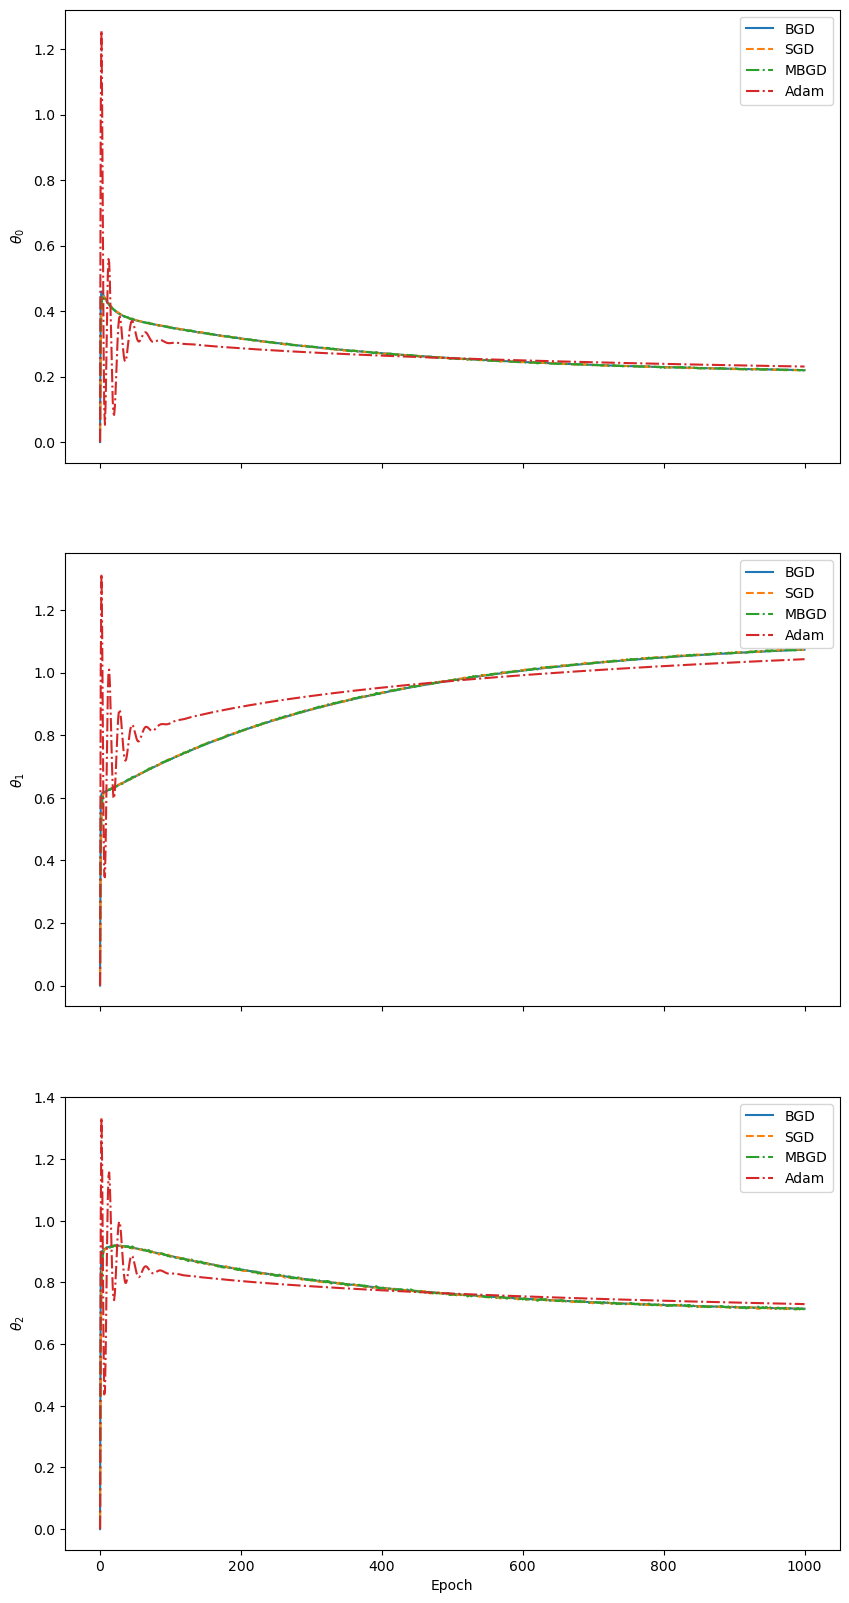

In [10]:
# 
# YOUR CODE HERE
# 
epochs = np.linspace(0, n_epochs, n_epochs+1)

fig, ax = plt.subplots(3,1, sharex=True, figsize=(10, 20))
ax[0].plot(epochs, bgd[1][:,0], label='BGD')
ax[0].plot(epochs, sgd[1][:,0], linestyle='--', label='SGD')
ax[0].plot(epochs, mbgd[1][:,0], linestyle='-.', label='MBGD')
ax[0].plot(epochs, Adam[1][:,0], linestyle='-.', label='Adam')
ax[1].plot(epochs, bgd[1][:,1], label='BGD')
ax[1].plot(epochs, sgd[1][:,1], linestyle='--', label='SGD')
ax[1].plot(epochs, mbgd[1][:,1], linestyle='-.', label='MBGD')
ax[1].plot(epochs, Adam[1][:,1], linestyle='-.', label='Adam')
ax[2].plot(epochs, bgd[1][:,2], label='BGD')
ax[2].plot(epochs, sgd[1][:,2], linestyle='--', label='SGD')
ax[2].plot(epochs, mbgd[1][:,2], linestyle='-.', label='MBGD')
ax[2].plot(epochs, Adam[1][:,2], linestyle='-.', label='Adam')
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[2].set_xlabel('Epoch')
ax[0].set_ylabel(r'$\theta_0$')
ax[1].set_ylabel(r'$\theta_1$')
ax[2].set_ylabel(r'$\theta_2$')
plt.show()

The Adam optimizer gives similar values for $\theta$ as the other methods, but has a very different convergence. The Adam optimizer results in large changes in $theta$ for the first epochs, but then the changes becomes smaller and smaller before it converges similarly to the other methods. 
